### 灰度图

In [3]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

img=cv2.imread('cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
cv2.imshow("img_gray", img_gray)
cv2.waitKey(0)    
cv2.destroyAllWindows() 

### HSV
- H - 色调（主波长）。 
- S - 饱和度（纯度/颜色的阴影）。 
- V值（强度）

In [3]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

cv2.imshow("hsv", hsv)
cv2.waitKey(0)    
cv2.destroyAllWindows()

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)


- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- ret:  返回阈值
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转



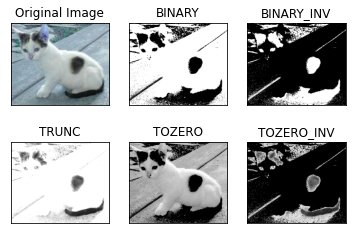

[[255 255 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255 255]]


In [4]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()
print(thresh1)

### 图像平滑

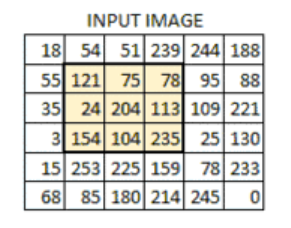

In [5]:
img = cv2.imread('lenaNoise.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# 均值滤波
# 简单的平均卷积操作
# 一般是奇数
blur = cv2.blur(img, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 方框滤波
# 基本和均值一样，可以选择归一化
# 只是多了一个参数
# -1：表示处理后的颜色通道数是一致的
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=False)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 高斯滤波
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
# 离中心点越接近的值是其可能性越大，充分考虑到不同像素点对中心点的影响
aussian = cv2.GaussianBlur(img, (5, 5), 1)  

cv2.imshow('aussian', aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 中值滤波
# 相当于用中值代替
median = cv2.medianBlur(img, 5)  # 中值滤波

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 展示所有的
# 水平堆叠
hsres = np.hstack((blur,aussian,median))
# 垂直堆叠
vsres = np.vstack((blur,aussian,median))
# print (res)
# print(res.shape)
cv2.imshow('median vs average', hsres)
cv2.imshow('median vs average', vsres)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学-腐蚀操作

In [12]:
img = cv2.imread('dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
kernel = np.ones((3,3),np.uint8) 
erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
pie = cv2.imread('pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
kernel = np.ones((38,38),np.uint8) 
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学-膨胀操作

In [16]:
img = cv2.imread('dige.png')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
kernel = np.ones((3,3),np.uint8) 
dige_erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
kernel = np.ones((3,3),np.uint8) 
dige_dilate = cv2.dilate(dige_erosion,kernel,iterations = 5)

cv2.imshow('dilate', dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
pie = cv2.imread('pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 开运算与闭运算

In [20]:
# 开：先腐蚀，再膨胀
img = cv2.imread('dige.png')

kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# 闭：先膨胀，再腐蚀
img = cv2.imread('dige.png')

kernel = np.ones((5,5),np.uint8) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
print(type(closing))
cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()



<class 'numpy.ndarray'>


### 梯度运算

In [22]:
# 梯度=膨胀-腐蚀
pie = cv2.imread('pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)

res = np.hstack((dilate,erosion))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 礼帽与黑帽
- 礼帽 = 原始输入-开运算结果 = 原始输入-(先腐蚀，再膨胀)
- 黑帽 = 闭运算-原始输入 = (先膨胀，再腐蚀)-原始输入

In [24]:
#礼帽
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
#黑帽
img = cv2.imread('dige.png')
blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat ', blackhat )
cv2.waitKey(0)
cv2.destroyAllWindows()

### 图像梯度-Sobel算子

![title](sobel_1.png)

In [26]:
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度，一般为-1
- dx和dy分别表示水平和竖直方向，判断是计算x方向还是y方向，通过指定0or1
- ksize是Sobel算子的大小


In [27]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [28]:
# 1，0:表示Gx
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
print(cv2.CV_64F)
cv_show(sobelx,'sobelx')

6


白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以上面的图像只显示了一半


所以要取绝对值，看以下代码：

In [29]:
# 1，0:表示Gx
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx,'sobelx')

In [35]:
# 0,1:表示Gy
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)  
cv_show(sobely,'sobely')

分别计算x和y，再求和

In [36]:
# 两张图片融合
# sobelxy = 0.5*sobelx+0.5*sobely+0
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

不建议直接计算

In [37]:
# 效果好像不太好
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

In [38]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

In [39]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
cv_show(sobelxy,'sobelxy')

In [40]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show(sobelxy,'sobelxy')

### 图像梯度-Scharr算子

![title](scharr.png)

### 图像梯度-laplacian算子

![title](l.png)

In [31]:
#不同算子的差异
# Sobel算子
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  
# Scharr算子
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 
# Laplacian算子：考虑到二阶导，但对噪音点敏感
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')

In [32]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show(img,'img')

### Canny边缘检测
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。

- 2)        计算图像中每个像素点的梯度强度和方向。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应(如人脸检测的框的确定)。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

#### 1:高斯滤波器

![title](canny_1.png)

#### 2:梯度和方向

![title](canny_2.png)

#### 3：非极大值抑制
比较该点与邻居点的梯度大小，如果是最大，则该点为边界点

![title](canny_3.png)

![title](canny_6.png)

#### 4：双阈值检测

![title](canny_5.png)

In [33]:
img=cv2.imread("lena.jpg",cv2.IMREAD_GRAYSCALE)

# minval=80,maxval=150
v1=cv2.Canny(img,380,390)
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show(res,'res')


In [34]:
img=cv2.imread("car.png",cv2.IMREAD_GRAYSCALE)
# cv_show(img,'original_img')
v1=cv2.Canny(img,120,250)
v2=cv2.Canny(img,50,100)

res = np.hstack((img,v1,v2))
cv_show(res,'res')

### 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔
- $G_i$表示输入的图片

![title](Pyramid_1.png)

#### 高斯金字塔：向下采样方法（缩小）

![title](Pyramid_2.png)

#### 高斯金字塔：向上采样方法（放大）

![title](Pyramid_3.png)

In [35]:
img=cv2.imread("AM.png")
cv_show(img,'img')
print (img.shape)

(442, 340, 3)


In [36]:
up=cv2.pyrUp(img)
cv_show(up,'up')
print (up.shape)

(884, 680, 3)


In [47]:
down=cv2.pyrDown(img)
cv_show(down,'down')
print (down.shape)

(221, 170, 3)


In [48]:
up2=cv2.pyrUp(up)
cv_show(up2,'up2')
print (up2.shape)

(1768, 1360, 3)


In [49]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show(up_down,'up_down')

In [50]:
cv_show(np.hstack((img,up_down)),'up_down')

In [51]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show(img-up_down,'img-up_down')

#### 拉普拉斯金字塔

![title](Pyramid_4.png)

In [52]:
down=cv2.pyrDown(img)
down_up=cv2.pyrUp(down)
l_1=img-down_up
# cv_show(l_1,'l_1')

down=cv2.pyrDown(l_1)
down_up=cv2.pyrUp(down)
l_2=l_1-down_up

down=cv2.pyrDown(l_2)
down_up=cv2.pyrUp(down)
l_3=l_2-down_up
cv_show(np.hstack((l_1,l_2,l_3)),'l_1_2_3')

### 图像轮廓

#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;(一般最常使用)

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

![title](chain.png)

为了更高的准确率，使用二值图像。

In [56]:
img = cv2.imread('contours.png')
cv_show(img,'original_img')
# 最好使用二值图像
# 先转灰度图
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 再取一个二值图像
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
hstack = np.hstack((gray,thresh))
cv_show(hstack,'thresh')

In [60]:
# 返回：
# binary：就是刚才输入的二值图像
# contours:list结构，保存的是轮廓点
# hierarchy:保存的层级信息
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

####  绘制轮廓

In [61]:
cv_show(img,'img')

In [65]:
#传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
# 注意需要copy,要不原图会变。。。
draw_img = img.copy()
# cv2.drawContours()绘制轮廓函数
# draw_img:在原图像上绘制轮廓
# contours：轮廓
# -1：画所有轮廓，如果是2，表示画第2个轮廓
# (0, 0, 255)：BGR的颜色通道，自己选定绘制轮廓的颜色
# 2：绘制线条的宽度
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
print(res.shape)
cv_show(res,'res')

(466, 619, 3)


In [72]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 2, (0, 0, 255), 1)
cv_show(res,'res')

#### 轮廓特征

In [73]:
cnt = contours[0]

In [74]:
#面积
cv2.contourArea(cnt)

8500.5

In [75]:
#周长，True表示闭合的
cv2.arcLength(cnt,True)

437.9482651948929

#### 轮廓近似

![title](contours3.png)

In [38]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show(res,'res')

In [39]:
epsilon = 0.15*cv2.arcLength(cnt,True) 
# cv2.approxPolyDP()近似函数
# cnt：要对哪个轮廓进行近似
# epsilon:设置近似的阈值
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res,'res')

In [40]:
epsilon = 0.0001*cv2.arcLength(cnt,True) 
# cv2.approxPolyDP()近似函数
# cnt：要对哪个轮廓进行近似
# epsilon:设置近似的阈值
approx = cv2.approxPolyDP(cnt,epsilon,True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res,'res')

####  边界矩形

In [84]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[4]
## 用一个最小的矩形将找到的轮廓包围起来
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv_show(img,'img')

In [85]:
# 轮廓面积
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
# 边界矩形面积
rect_area = w * h
extent = float(area) / rect_area
print ('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.520365296803653


#### 外接圆

In [87]:
(x,y),radius = cv2.minEnclosingCircle(cnt) 
center = (int(x),int(y)) 
radius = int(radius) 
img = cv2.circle(img,center,radius,(0,255,0),2)
cv_show(img,'img')

### 模板匹配

模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)

In [18]:
# 模板匹配
# 先读取图像并且转为灰度图
img = cv2.imread('lena.jpg', 0)
template = cv2.imread('face.jpg', 0)
h, w = template.shape[:2] 
print(template.shape)
print(h,w)
cv_show(img,'img')

(110, 85)
110 85


- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关
- 最好使用带归一化的结果


公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [7]:
img.shape

(263, 263)

In [8]:
template.shape

(110, 85)

In [9]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [16]:
# 进行模板匹配
# 返回每个窗口左上角的值和损失大小
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
# 263-110=154
print(res.shape)
print(res)

(154, 179)
[[39403584. 38979344. 38493680. ... 60698256. 61081040. 61507070.]
 [39333950. 38932290. 38474590. ... 60777184. 61199310. 61703424.]
 [39267630. 38889344. 38456784. ... 60902240. 61378784. 61972430.]
 ...
 [52950464. 54199424. 55437870. ... 42661790. 41786320. 40908720.]
 [53161120. 54401330. 55570970. ... 42322320. 41494384. 40667200.]
 [53368896. 54600200. 55666304. ... 41947264. 41187520. 40411570.]]


In [11]:
# 返回最大最小值及其坐标位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [15]:
print(min_val, max_val, min_loc, max_loc)

39168.0 74403584.0 (107, 89) (159, 62)


4


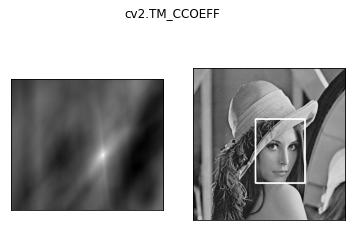

5


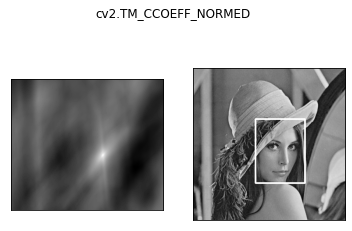

2


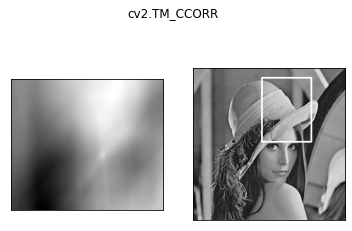

3


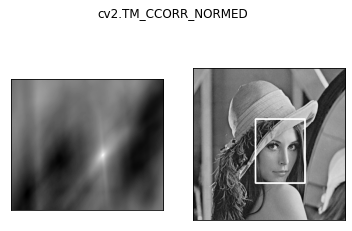

0


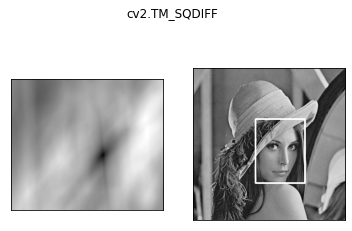

1


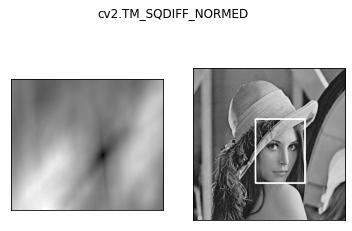

In [19]:
for meth in methods:
    img2 = img.copy()

    # 匹配方法的真值
    method = eval(meth)
    print (method)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # 画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### 匹配多个对象

In [4]:
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg', 0)
h, w = template.shape[:2]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# 取匹配程度大于%80的坐标
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):  # *号表示可选参数
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)

cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)

13